## Problem Statement 1

Define a ML technique that you would use for the fake news detection.
Build a Machine learning Model to detect the Fake new detection.
We could use online Jupyter Lab or similar environment to build, train and test the model
You could use your choice of dataset for the training and testing this model or any
dataset from https://www.kaggle.com/datasets?search=Fake+news
Based on the Test data set you should also be able to identify the accuracy of the Model

### Approach towards problem

I am using dataset from https://www.kaggle.com/c/fake-news/data to classify fake news. Used CountVectorizer for basic text classification else could have gone for TfidfVectorizer as well. With CountVectorizer, a Bag Of Words will be created. Prior to that, removal of non-characters, conversion in small case, stemming and stop words removal is used for text pre-processing. There is lemmatization also which is a advance technique than stemming as proper word root can be extracted but here we go with stemming only as it suffices our purpose. For classification, Naive Bayes algorithm is used as it performs well with text classification. Confusion matrix is also used to measure performance of model on test data.

In [2]:
import pandas as pd

In [3]:
# Reading training data
df = pd.read_csv('train.csv')

In [4]:
# Checking the dimensions of data
df.shape

(20800, 5)

In [5]:
# Checking on few records
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
# Removing rows where text column is NA as this is of our prime contention
df = df[df['text'].notna()]

In [8]:
# Resetting the index as this helps to index properly all records else few index will be missing in between as
# we have dropped NA records
df.reset_index(inplace=True)
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Initialising PorterStemmer for stemming
ps = PorterStemmer()
corpus = []

# looping through all records to remove non-characters, convert into lower case, remove stop words and 
# stem them as well

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
# Get the Independent Features
X = df.drop('label', axis=1)

In [11]:
X.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [12]:
# Get the Dependent features
y = df['label']

In [13]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [14]:
# Applying Countvectorizer
# Creating the Bag of Words model by using n-gram in range of 1 to 3, i.e., where a word, 2 words and 3 words 
# are extracted
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [15]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [16]:
# Displaying 20 features which will form input features for modelling
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [17]:
# Displaying different parameters of CountVectorizer
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [18]:
# Creating dataframe of train data to show Bag Of Words matrix
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Using Naive Bayes algorithm as it is one of the best when it comes to text classification
classifier = MultinomialNB()

In [ ]:
# Could have used this function but scikit-learn should be 0.22 or more. 
# Hence, I went with custom function to plot confusion matrix which is open-sourced and found online.
# from sklearn.metrics import plot_confusion_matrix

In [21]:
# Custom function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.884
Confusion matrix, without normalization


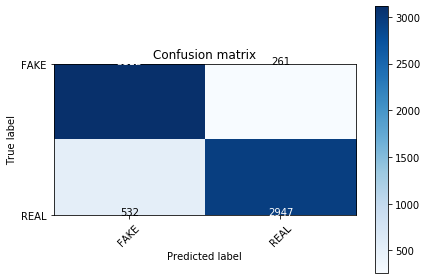

In [22]:
# Training the model
classifier.fit(X_train, y_train)

# Testing our model on test data
pred = classifier.predict(X_test)

# Getting the accuracy score of our model
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

# Calculating confusion matrix and plotting the same using our custom function
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Conclusion
From accuracy score of 0.884 we can observe that just goung with basic techniques in NLP and Naive Bayes we are able to get good accuracy. We can go for advance techniques as well to further improve upon our model.